In [1]:
using Plots
using LaTeXStrings
using Printf

In [2]:
function numerical_derivative(f, x; h=1e-8)
    g = (f(x+h) - f(x)) / h
    return g
end

numerical_derivative (generic function with 1 method)

In [3]:
f(x) = sin(x)
f′(x) = cos(x)
x = π / 4

0.7853981633974483

In [4]:
x = π / 3
numerical_derivative(f, x)

0.4999999969612645

In [5]:
f′(x)

0.5000000000000001

In [6]:
H = [0.1^i for i in 4:0.5:10]
E = similar(H)

for i in eachindex(H)
    d = numerical_derivative(f, x, h=H[i])
    e = abs(d - f′(x))
    E[i] = e
end

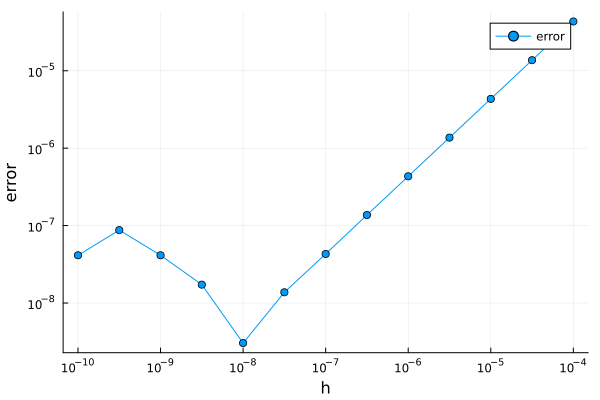

In [7]:
plot(H, E, xaxis=:log, yaxis=:log, xlabel="h", ylabel="error", label="error", grid=true, marker=:circle)
xaxis!(
    [0.1^i for i in 2:10],
)

yaxis!(
    [0.1^i for i in 2:10],
)

In [8]:
f(x, y) =  y*x^2 + (1/(x^2 + y^2 + 1))
f_x(x, y) = 2x*y - 2x/(x^2 + y^2 + 1)^2
f_y(x, y) = x^2 - 2y/(x^2 + y^2 + 1)^2

f_y (generic function with 1 method)

In [9]:
function numerical_gradient(f, x::Vector; h=1e-8)
    n = length(x)
    g = zeros(n)
    y = f(x...)
    for i in 1:n
        x[i] += h
        g[i] = (f(x...) - y) / h
        x[i] -= h
    end
    return g
end

numerical_gradient (generic function with 1 method)

In [10]:
x = 0.5
y = -0.5

numerical_gradient(f, [x, y])

2-element Vector{Float64}:
 -0.9444444559747467
  0.6944444463918842

In [11]:
[f_x(x, y), f_y(x, y),]

2-element Vector{Float64}:
 -0.9444444444444444
  0.6944444444444444

In [12]:
function weight(n, k)
    @assert n % 2 == 0
    A = zeros(n + 1, n + 1)
    r = -n÷2:n÷2
    for i in 1:n+1
        A[i, :] = r.^(i-1)
    end
    return inv(A)[:, k+1]
end

weight (generic function with 1 method)

In [13]:
function numerical_derivative(f, x, n, k, h)
    w = weight(n, k)
    g = 0.0
    p = n ÷ 2
    args = ((-p:p).* h .+ x) 
    return sum(f.(args) .* w) / h
end

numerical_derivative (generic function with 2 methods)

In [14]:
using KahanSummation

function numerical_derivative_kahan(f, x, n, k, h)
    w = weight(n, k)
    g = 0.0
    p = n ÷ 2
    args = ((-p:p).* h .+ x) 
    return KahanSummation.sum(f.(args) .* w) / h
end

numerical_derivative_kahan (generic function with 1 method)

In [15]:
f(x) = sin(x)
f′(x) = cos(x)
x = π / 4

0.7853981633974483

In [16]:
k = 1

N = 2:2:10
H = [0.1^i for i in 0:0.1:10]

errors = [Float64[] for i in eachindex(N)]

for n in N
    for h in H
        d = numerical_derivative(f, x, n, k, h)
        e = abs(d - f′(x))
        push!(errors[n÷2], e)
    end
end

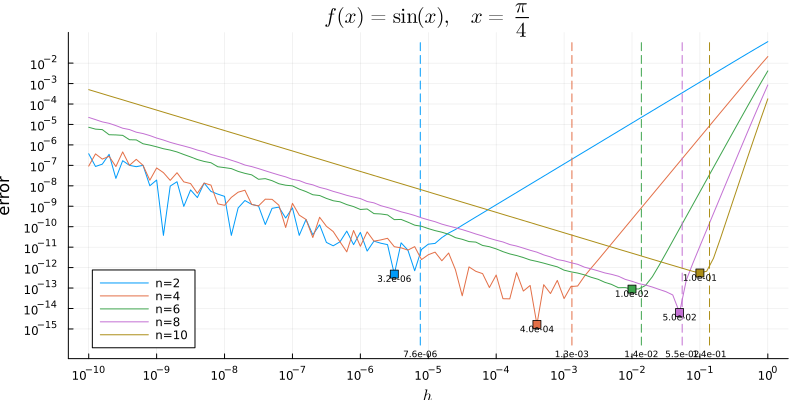

In [26]:
plot()


machine_eps = eps(Float64)

COLORES = get_color_palette(:auto, plot_color(:white))

for (i, error) in enumerate(errors)
    plot!(H, error, label="n=$(N[i])", markersize=3, color=COLORES[i])
    h = H[argmin(error)]
    scatter!([h], [minimum(error)], label="", marker=:rect, color=COLORES[i])
    h_str = @sprintf("%.1e", h)
    annotate!(h, minimum(error), text(h_str, 6, :top))
    # machine_eps の N[i] + 1 乗根の値に線を引く
    n = N[i]
    coef = factorial(n) / sqrt(n)
    h_estimate = (coef * machine_eps / abs(f(x)))^(1 / (n + 1))
    plot!([h_estimate, h_estimate], [1e-1, 1e-16], label="", linestyle=:dash, color=COLORES[i])
    h_estimate_str = @sprintf("%.1e", h_estimate)
    annotate!(h_estimate, 1e-16, text("$h_estimate_str", 6, :top))
end

plot!(xaxis=:log, yaxis=:log, xlabel=L"h", ylabel="error", grid=true, size=(800, 400), legend=:bottomleft)

xaxis!(
    [0.1^i for i in 0:10],
)


yaxis!(
    [0.1^i for i in 2:15],
)

plot!()

title!(
    L"f(x) = \sin(x), \quad x = \frac{\pi}{4}"
)


# savefig("../img/numd2.png")
# savefig("../img/numd3.png")